In [2]:
# Importing the libraries needed for the project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') # to enhance the quality of the visual
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6) # to adjust width and height of the figure in inches



In [3]:
# Read in the data from both files
ga4 = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\GAnalyticsCountryRegion.csv')
gads = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\GoogleCountryData.csv')

In [24]:
#checking the data in the google analytics file

ga4.sample(10)

,Country,Ecommerce purchases,Purchase revenue,Checkouts,Add to carts,New users,Total users,Bounce rate,Sessions,Views per user,Average engagement time
69,El Salvador,1,352.060000,7,3,61,65,0.200000,160,15.400000,288.661539
179,Niger,0,0.000000,0,0,11,9,0.222222,9,19.555556,325.666667
96,Andorra,0,0.000000,0,0,16,17,0.150000,20,4.058824,44.176471
177,New Caledonia,0,0.000000,0,0,1,1,0.000000,1,6.000000,125.000000
196,St. Lucia,0,0.000000,0,0,5,5,0.285714,7,3.000000,20.600000
68,Ecuador,1,322.310000,9,40,202,207,0.320346,462,14.149758,285.159420
147,Guinea,0,0.000000,0,0,23,23,0.583333,24,1.521739,10.000000
29,Indonesia,7,3542.896891,32,176,617,706,0.226259,1211,11.842407,236.247851
77,Kuwait,1,367.770000,15,9,124,128,0.207317,164,9.507812,145.398438
58,Myanmar (Burma),2,910.739999,6,36,31,32,0.167832,286,92.437500,1517.000000


In [ ]:
#In one of the files I have advertising budget divided by country and region, but the revenue is only based on countries. 
gads.drop(columns=['Region (Matched)'], inplace=True)

In [26]:
gads.sample(10)

,Country/Territory (Matched),Currency code,Cost,CTR,Avg. CPC,Conversions,Cost / conv.,Conv. rate,Conv. value,Conv. value / cost,Avg. CPM,Impr.,Clicks
127,Spain,EUR,2.40,3.27%,0.04,0.00,0.00,0.00%,0,0.00,1.43,"1,682",55
284,United States,EUR,22.53,24.87%,0.16,4.49,5.02,3.10%,"1,762.34",78.22,39.46,571,142
52,Germany,EUR,8.99,7.09%,0.15,3.00,3.00,4.92%,"1,119.83",124.60,10.80,832,59
36,France,EUR,1.26,8.92%,0.04,0.00,0.00,0.00%,0,0.00,3.31,381,34
23,Canada,EUR,8.78,6.05%,0.20,0.00,0.00,0.00%,0,0.00,11.81,744,45
154,Spain,EUR,1.06,4.61%,0.05,0.00,0.00,0.00%,0,0.00,2.22,477,22
133,Spain,EUR,4.34,4.94%,0.04,0.00,0.00,0.00%,0,0.00,2.09,"2,083",103
179,Spain,EUR,0.01,0.37%,0.01,0.00,0.00,0.00%,0,0.00,0.05,273,1
21,Canada,EUR,0.08,3.95%,0.03,0.00,0.00,0.00%,0,0.00,1.10,76,3
242,United States,EUR,431.94,18.36%,0.30,42.53,10.16,2.90%,"16,149.31",37.39,55.53,"7,779","1,428"


In [30]:
#Checking for null values through a loop (No null values in the first file)

for col in gads.columns:
    percentage_missing = np.mean(gads[col].isnull())
    print('{} - {}%'.format(col, percentage_missing))

Country/Territory (Matched) - 0.0%
Currency code - 0.0%
Cost - 0.0%
CTR - 0.0%
Avg. CPC - 0.0%
Conversions - 0.0%
Cost / conv. - 0.0%
Conv. rate - 0.0%
Conv. value - 0.0%
Conv. value / cost - 0.0%
Avg. CPM - 0.0%
Impr. - 0.0%
Clicks - 0.0%


In [32]:
#Checking the second file for nul values

null_counts = ga4.isnull().sum()
print(null_counts)

Country                    0
Ecommerce purchases        0
Purchase revenue           0
Checkouts                  0
Add to carts               0
New users                  0
Total users                0
Bounce rate                0
Sessions                   0
Views per user             0
Average engagement time    0
dtype: int64


In [34]:
#Checking the type of data I have in each columns
ga4.dtypes


Country                     object
Ecommerce purchases          int64
Purchase revenue           float64
Checkouts                    int64
Add to carts                 int64
New users                    int64
Total users                  int64
Bounce rate                float64
Sessions                     int64
Views per user             float64
Average engagement time    float64
dtype: object

In [36]:
gads.dtypes

Country/Territory (Matched)     object
Currency code                   object
Cost                           float64
CTR                             object
Avg. CPC                       float64
Conversions                    float64
Cost / conv.                   float64
Conv. rate                      object
Conv. value                     object
Conv. value / cost             float64
Avg. CPM                       float64
Impr.                           object
Clicks                          object
dtype: object

In [38]:
gads.drop(columns=['Currency code'], inplace=True)

In [44]:
#changing the data type for some of the columns in the Google analytics file as we will need it for the below processes

ga4['Purchase revenue']= ga4['Purchase revenue'].astype('int64')
ga4['Views per user'] = ga4['Views per user'].round(1)
ga4['Average engagement time']=ga4['Average engagement time'].round(1)
ga4['Bounce rate']=	ga4['Bounce rate'].round(1)

In [55]:
print(gads['Conv. rate'].dtype)

float64


In [57]:
#Change the data type for some columns in my advertising data file (google ads file)

gads['Cost']= gads['Cost'].astype('int64')
gads['Conversions']= gads['Conversions'].astype('int64')
gads['Conv. rate'] = gads['Conv. rate'].astype('float64')/100

In [59]:
gads['CTR'] = gads['CTR'].str.rstrip('%').astype('float64')/100

In [61]:
gads['Conv. value'] = gads['Conv. value'].fillna(0)  # Replacing NaN with 0 since it is not allowing us to directly convert to int64
gads['Conv. value'] = gads['Conv. value'].str.replace(',', '').astype('float64').round().astype('int64')


In [63]:
gads['Impr.'] = gads['Impr.'].str.replace(',', '').astype('float64').round().astype('int64')
gads['Clicks'] = gads['Clicks'].str.replace(',', '').astype('float64').round().astype('int64')

In [65]:
gads.dtypes

Country/Territory (Matched)     object
Cost                             int64
CTR                            float64
Avg. CPC                       float64
Conversions                      int64
Cost / conv.                   float64
Conv. rate                     float64
Conv. value                      int64
Conv. value / cost             float64
Avg. CPM                       float64
Impr.                            int64
Clicks                           int64
dtype: object

In [67]:
#Sorting the values based on ecommerce purchases for both files

ga4=ga4.sort_values(by=['Ecommerce purchases'], inplace=False, ascending=False)
gads=gads.sort_values(by=['Conversions'], inplace=False, ascending=False)

In [69]:
pd.set_option('display.max_rows', None)

In [71]:
gads.head()

,Country/Territory (Matched),Cost,CTR,Avg. CPC,Conversions,Cost / conv.,Conv. rate,Conv. value,Conv. value / cost,Avg. CPM,Impr.,Clicks
237,United States,1269,0.0647,0.38,53,23.66,0.000125,24131,19.01,24.65,51510,3335
265,United States,2276,0.0421,0.44,44,51.74,0.000060,17245,7.57,18.71,121658,5119
242,United States,431,0.1836,0.30,42,10.16,0.000290,16149,37.39,55.53,7779,1428
229,United Kingdom,750,0.1005,0.20,41,18.31,0.000103,16324,21.75,19.68,38140,3832
271,United States,201,0.1678,0.34,31,6.37,0.000511,12786,63.40,57.54,3505,588


In [73]:
# In the advertising file I had initially a more detailed overview not only for countries but also for regions. Since the other file is only on country level and I don't have data for the regions I will make the advertising file to only on country level
ad_data = gads.groupby('Country/Territory (Matched)').agg({
    'Cost': 'sum',
    'Conversions': 'sum',
    'Impr.': 'sum',
    'Conv. value': 'sum',
    'Clicks': 'sum',
    'CTR': 'first',
    'Avg. CPC': 'first',
    'Cost / conv.': 'first',
    'Conv. rate': 'first',
    'Conv. value / cost': 'first',
    'Avg. CPM': 'first'
}).reset_index()


In [52]:
print(ad_data)

   Country/Territory (Matched)  Cost  Conversions   Impr.  Conv. value  \
0                    Australia   133           22   18218         8826   
1                       Canada   563           42   35463        17059   
2                       France   230           26   13274        10982   
3                      Germany   472           39   31809        19258   
4                    Hong Kong    87           12   68731         5264   
5                        Japan   152           13   93424         6289   
6                  Netherlands   117           12    9435         5446   
7                        Spain   282           18  102867         9093   
8                       Sweden   361           14   13441         6752   
9                  Switzerland   106           15    5506         6541   
10              United Kingdom   816           49   43598        19105   
11               United States  9893          511  384219       213061   

    Clicks     CTR  Avg. CPC  Cost / 

In [75]:
ad_data['CTR']=ad_data['Clicks']/ad_data['Impr.'].astype('float64')
                                                        

In [79]:
#while moving from a region detailed spreadsheet to a country one (less detailed) some of the columns make sense to be recalculcated:

ad_data['Avg. CPC'] = ad_data['Cost']/ad_data['Clicks'].astype('float64')
ad_data['Cost / conv.'] = ad_data['Cost']/ad_data['Conversions']
ad_data['Conv. rate'] = ad_data['Conversions']/ad_data['Clicks']
ad_data['Conv. value / cost'] = ad_data['Conv. value']/ad_data['Cost']

In [81]:
#sorting the values I can already see that the US even in terms of spending and conversions attributed was the most important country 

ad_data.sort_values(by=['Conversions'], inplace=False, ascending=False)

,Country/Territory (Matched),Cost,Conversions,Impr.,Conv. value,Clicks,CTR,Avg. CPC,Cost / conv.,Conv. rate,Conv. value / cost,Avg. CPM
11,United States,9893,511,384219,213061,27452,0.071449,0.360374,19.360078,0.018614,21.536541,24.65
10,United Kingdom,816,49,43598,19105,4282,0.098216,0.190565,16.653061,0.011443,23.412990,19.68
1,Canada,563,42,35463,17059,3175,0.089530,0.177323,13.404762,0.013228,30.300178,18.67
3,Germany,472,39,31809,19258,2421,0.076111,0.194961,12.102564,0.016109,40.800847,12.94
2,France,230,26,13274,10982,1352,0.101853,0.170118,8.846154,0.019231,47.747826,20.98
0,Australia,133,22,18218,8826,1153,0.063289,0.115351,6.045455,0.019081,66.360902,8.21
7,Spain,282,18,102867,9093,4973,0.048344,0.056706,15.666667,0.003620,32.244681,4.88
9,Switzerland,106,15,5506,6541,819,0.148747,0.129426,7.066667,0.018315,61.707547,16.78
8,Sweden,361,14,13441,6752,1458,0.108474,0.247599,25.785714,0.009602,18.703601,29.36
5,Japan,152,13,93424,6289,943,0.010094,0.161188,11.692308,0.013786,41.375000,3.13


In [83]:
#I will join both of the files using the column country 
main_file = pd.merge(ga4, ad_data, left_on='Country', right_on='Country/Territory (Matched)', how='inner')



In [87]:
duplicate_rows = main_file.duplicated()
num_duplicates = duplicate_rows.sum()
print(num_duplicates)

0


In [89]:
main_file=main_file.sort_values(by='Purchase revenue', ascending=False)

In [91]:
main_file.head()

,Country,Ecommerce purchases,Purchase revenue,Checkouts,Add to carts,New users,Total users,Bounce rate,Sessions,Views per user,...,Conversions,Impr.,Conv. value,Clicks,CTR,Avg. CPC,Cost / conv.,Conv. rate,Conv. value / cost,Avg. CPM
0,United States,1118,471862,4849,15452,83320,84610,0.2,158516,10.4,...,511,384219,213061,27452,0.071449,0.360374,19.360078,0.018614,21.536541,24.65
1,Germany,88,36967,325,1130,6699,7051,0.3,14553,12.8,...,39,31809,19258,2421,0.076111,0.194961,12.102564,0.016109,40.800847,12.94
3,Australia,70,30941,382,937,4903,5044,0.2,10489,11.4,...,22,18218,8826,1153,0.063289,0.115351,6.045455,0.019081,66.360902,8.21
2,United Kingdom,73,29091,442,1251,7372,7662,0.3,14864,11.1,...,49,43598,19105,4282,0.098216,0.190565,16.653061,0.011443,23.412990,19.68
5,Canada,57,24427,335,1477,7422,7598,0.2,14902,11.3,...,42,35463,17059,3175,0.089530,0.177323,13.404762,0.013228,30.300178,18.67


In [93]:
#descriptive statistics summary

main_file.describe()

#Sales have a standard deviation of 308.85, indicating a wide variation in the number of purchases across Countries, as we have a limited number of countries brining majority of the sales and revenue.
#The average conversion rate (Conv. rate) is quite low at approximately 1.37%, with a low standard deviation, indicating that conversion rates vary modestly among entries but are generally low.If we would receive more clicks in the other countries since the conversion rate has low standard deviation we would expect to have the sales on those countries.

,Ecommerce purchases,Purchase revenue,Checkouts,Add to carts,New users,Total users,Bounce rate,Sessions,Views per user,Average engagement time,...,Conversions,Impr.,Conv. value,Clicks,CTR,Avg. CPC,Cost / conv.,Conv. rate,Conv. value / cost,Avg. CPM
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,139.416667,58343.916667,645.416667,2043.833333,11621.083333,11914.333333,0.258333,23123.083333,11.983333,214.408333,...,64.416667,68332.083333,27306.333333,4189.916667,0.080659,0.165429,12.801952,0.013741,40.936906,14.181667
std,308.852851,130510.553057,1328.215512,4238.330993,22685.523904,23007.092469,0.051493,42857.031615,1.709244,38.580270,...,141.220304,104709.504314,58729.518888,7455.287903,0.043100,0.081584,5.807826,0.004822,16.251678,8.952511
min,23.000000,8334.000000,110.000000,345.000000,2316.000000,2420.000000,0.200000,4553.000000,10.400000,176.300000,...,12.000000,5506.000000,5264.000000,819.000000,0.010094,0.056706,6.045455,0.003620,18.703601,0.980000
25%,34.750000,14310.500000,172.250000,492.250000,2892.750000,3003.250000,0.200000,6168.000000,11.025000,195.150000,...,13.750000,13399.250000,6478.000000,1102.000000,0.059553,0.109432,8.447115,0.010983,28.578381,7.377500
50%,52.000000,21777.500000,308.000000,919.500000,5629.500000,5863.000000,0.300000,12261.000000,11.350000,205.600000,...,20.000000,33636.000000,8959.500000,1405.000000,0.082820,0.165653,11.897436,0.013507,41.087924,14.860000
75%,70.750000,29553.500000,346.750000,1160.250000,7384.500000,7614.000000,0.300000,14873.500000,12.500000,221.775000,...,39.750000,74904.250000,17570.500000,3451.750000,0.103508,0.191664,15.913265,0.018390,50.937306,20.005000
max,1118.000000,471862.000000,4849.000000,15452.000000,83320.000000,84610.000000,0.300000,158516.000000,16.500000,321.500000,...,511.000000,384219.000000,213061.000000,27452.000000,0.148747,0.360374,25.785714,0.019231,66.360902,29.360000


In [ ]:
#Plotting the purchases vs the advertising cost to understand the correlation between them (if we can notice any)

Text(0.5, 1.0, 'Purchases vs. Advertising cost')

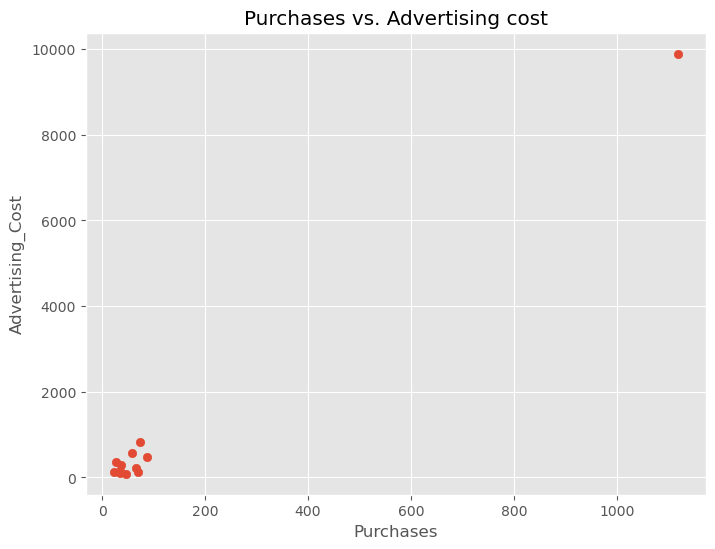

In [95]:
plt.figure(figsize=(8, 6)) 
plt.scatter(x=main_file['Ecommerce purchases'],y=main_file['Cost'])

plt.xlabel('Purchases')
plt.ylabel('Advertising_Cost')
plt.title('Purchases vs. Advertising cost')

In [ ]:
#Advertising cost and purchases number have a positive correlation. Will check below how strong is the relationship. We also can notice we have an outlier with extreme value compared to the rest of the points. We know that is US towards which goes majority of the ad budget and also bring the majority of the sales.

<Axes: xlabel='Ecommerce purchases', ylabel='Cost'>

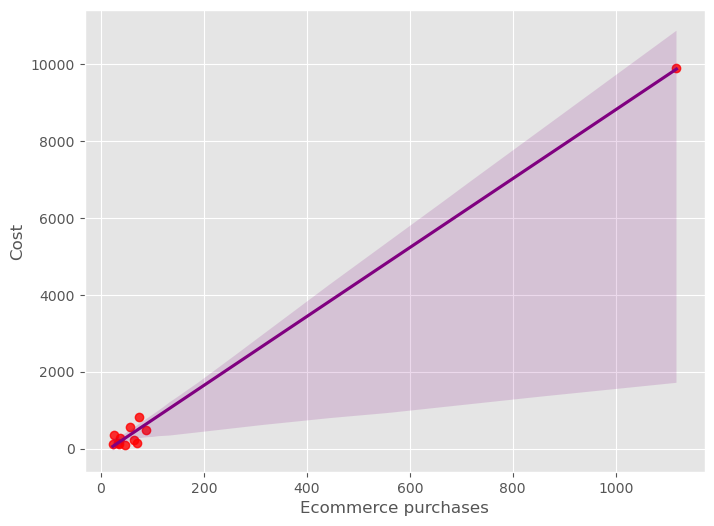

In [60]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Ecommerce purchases',y='Cost', data=main_file, scatter_kws={"color":"red"}, line_kws={"color":"purple"})

In [ ]:
#Advertising cost and purchases number have a positive correlation. 


<Axes: xlabel='Purchase revenue', ylabel='Cost'>

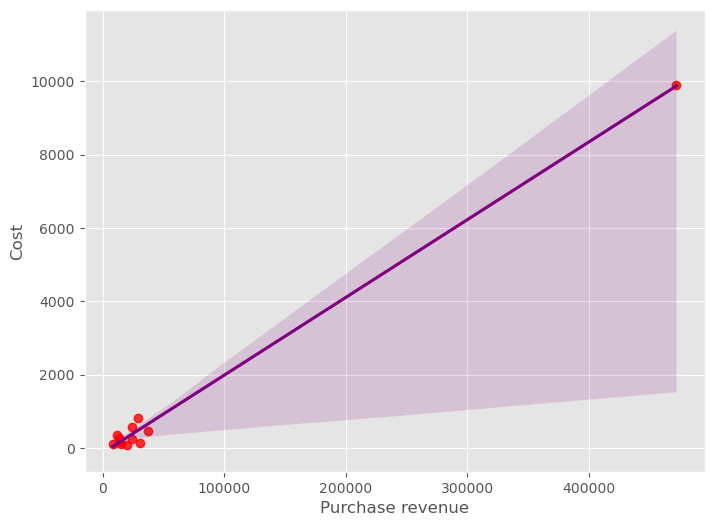

In [62]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Purchase revenue',y='Cost', data=main_file, scatter_kws={"color":"red"}, line_kws={"color":"purple"})

In [ ]:
#Will check now to see how strong is actually the correlation

In [64]:
#We first need to sort the values by the Purchase revenue column
sorted_main_file = main_file.sort_values(by='Purchase revenue', ascending=False)


In [66]:
numeric_df = sorted_main_file.select_dtypes(include=['number'])

In [68]:
correlation_matrix_sorted = numeric_df.corr(method='pearson')


In [70]:
print(correlation_matrix_sorted)

                         Ecommerce purchases  Purchase revenue  Checkouts  \
Ecommerce purchases                 1.000000          0.999943   0.998690   
Purchase revenue                    0.999943          1.000000   0.998538   
Checkouts                           0.998690          0.998538   1.000000   
Add to carts                        0.997616          0.997614   0.999007   
New users                           0.996876          0.996435   0.998747   
Total users                         0.996729          0.996261   0.998633   
Bounce rate                        -0.345783         -0.349538  -0.357678   
Sessions                            0.996555          0.996136   0.998585   
Views per user                     -0.310441         -0.307572  -0.314300   
Average engagement time            -0.172361         -0.169331  -0.173000   
Cost                                0.997320          0.997170   0.997471   
Conversions                         0.998374          0.998217   0.998239   

<function matplotlib.pyplot.show(close=None, block=None)>

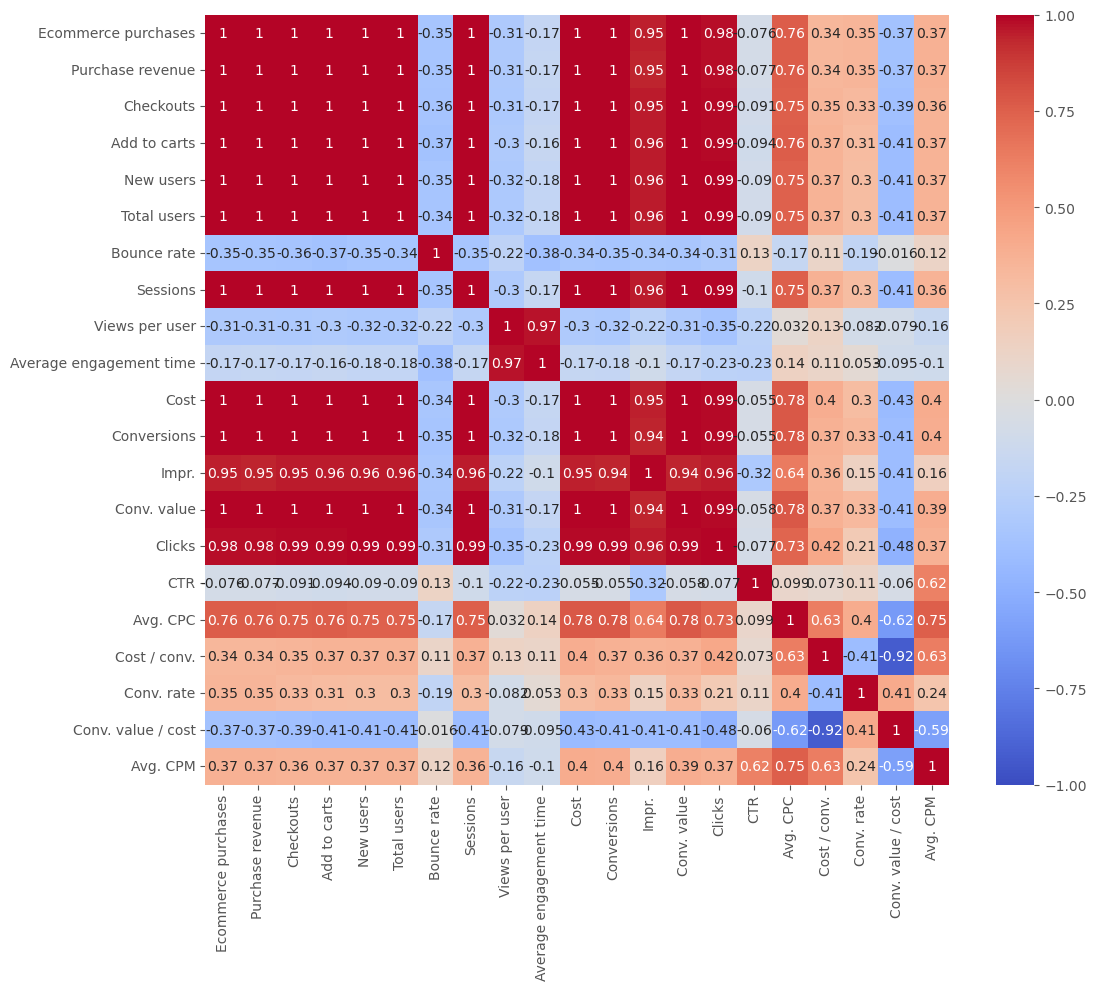

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.show

In [72]:
#Since my heatmap looks very crowded as I have too many columns I will keep only the columns I am highly interested to check

main_col = [
    'Ecommerce purchases',
    'Purchase revenue',
    'Checkouts',
    'New users',
    'Add to carts',
    'Cost',
    'Bounce rate',
    'Views per user'
]

In [74]:
filtered_corr_matrix = correlation_matrix_sorted.loc[main_col, main_col]


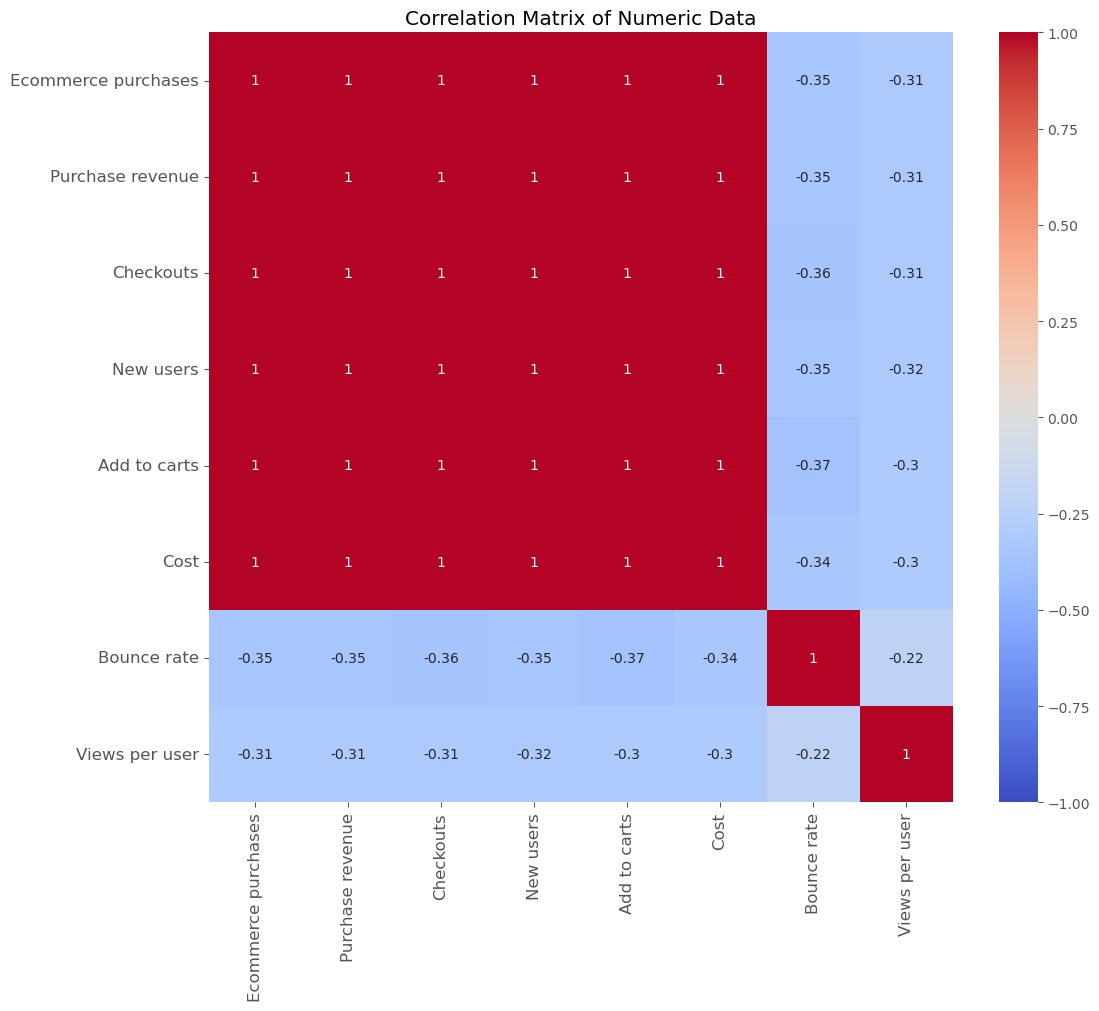

In [132]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Matrix of Numeric Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [84]:
#Since I want to have the country column and to understand the correlation values for country I will convert the country column to numbers

sorted_main_file_numerical = sorted_main_file

for col_name in sorted_main_file_numerical.columns:
    if sorted_main_file_numerical[col_name].dtype == 'object':
        sorted_main_file_numerical[col_name] = sorted_main_file_numerical[col_name].astype('category').cat.codes

    
sorted_main_file_numerical 

,Country,Ecommerce purchases,Purchase revenue,Checkouts,Add to carts,New users,Total users,Bounce rate,Sessions,Views per user,...,Conversions,Impr.,Conv. value,Clicks,CTR,Avg. CPC,Cost / conv.,Conv. rate,Conv. value / cost,Avg. CPM
0,11,1118,471862,4849,15452,83320,84610,0.2,158516,10.4,...,511,384219,213061,27452,0.071449,0.360374,19.360078,0.018614,21.536541,24.65
1,3,88,36967,325,1130,6699,7051,0.3,14553,12.8,...,39,31809,19258,2421,0.076111,0.194961,12.102564,0.016109,40.800847,12.94
3,0,70,30941,382,937,4903,5044,0.2,10489,11.4,...,22,18218,8826,1153,0.063289,0.115351,6.045455,0.019081,66.360902,8.21
2,10,73,29091,442,1251,7372,7662,0.3,14864,11.1,...,49,43598,19105,4282,0.098216,0.190565,16.653061,0.011443,23.412990,19.68
5,1,57,24427,335,1477,7422,7598,0.2,14902,11.3,...,42,35463,17059,3175,0.089530,0.177323,13.404762,0.013228,30.300178,18.67
4,2,65,23851,291,660,6356,6682,0.3,13056,11.3,...,26,13274,10982,1352,0.101853,0.170118,8.846154,0.019231,47.747826,20.98
6,4,47,19704,183,506,3003,3117,0.3,6240,10.8,...,12,68731,5264,949,0.013807,0.091675,7.250000,0.012645,60.505747,0.98
8,9,35,15431,140,345,2316,2420,0.3,4553,11.4,...,15,5506,6541,819,0.148747,0.129426,7.066667,0.018315,61.707547,16.78
9,5,34,14548,242,902,4344,4463,0.2,11466,16.5,...,13,93424,6289,943,0.010094,0.161188,11.692308,0.013786,41.375000,3.13
7,7,37,13598,334,1047,8623,9019,0.3,17319,10.7,...,18,102867,9093,4973,0.048344,0.056706,15.666667,0.003620,32.244681,4.88


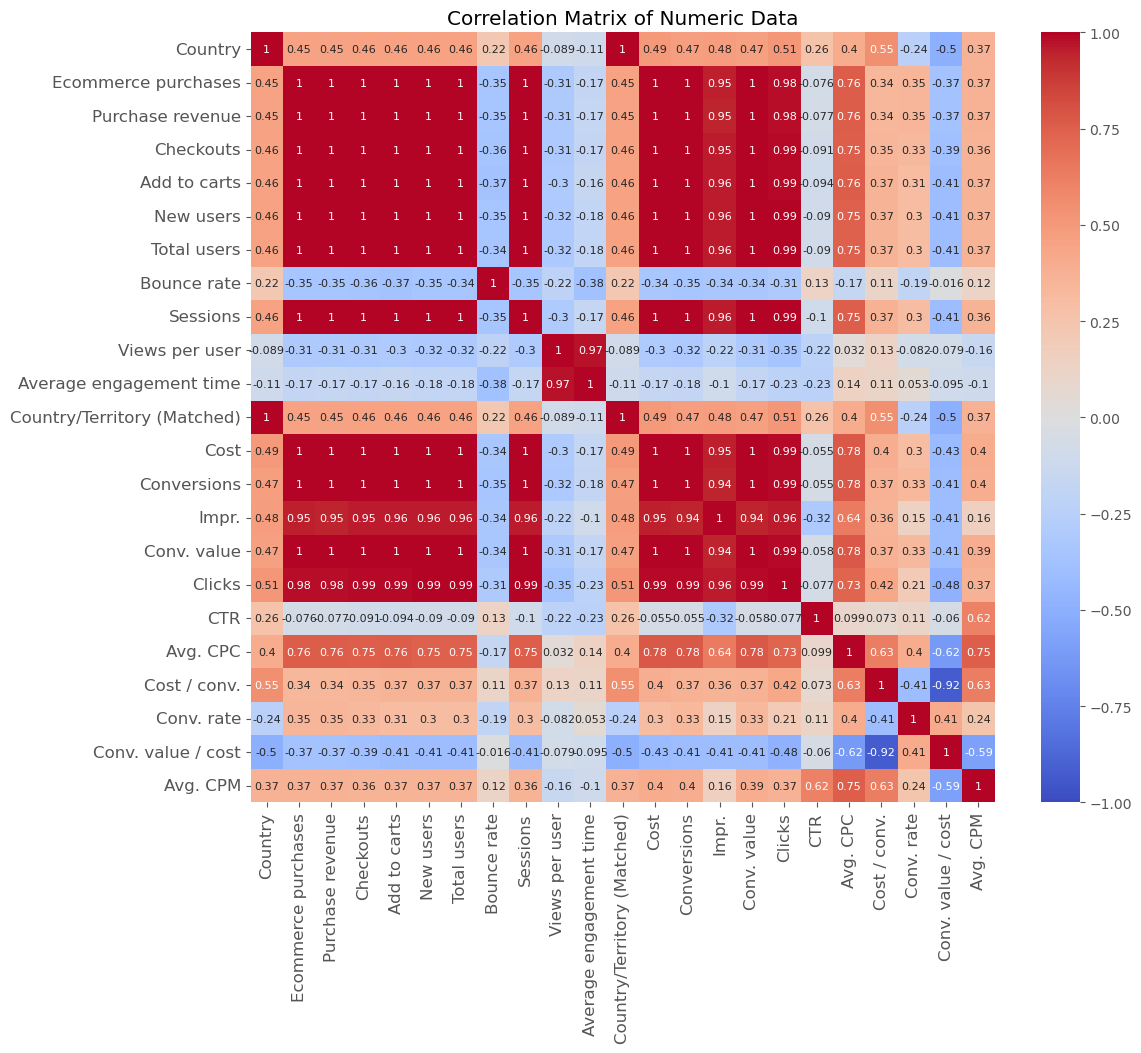

In [80]:
correlation_matrix = sorted_main_file_numerical.corr(method='pearson')
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numeric Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [88]:
# The heatmap is a good visual way to understand correlations between the variables but through
corr_mat = sorted_main_file_numerical.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

Country                      Country                        1.000000
                             Ecommerce purchases            0.453531
                             Purchase revenue               0.452134
                             Checkouts                      0.458432
                             Add to carts                   0.455452
                             New users                      0.460260
                             Total users                    0.460192
                             Bounce rate                    0.220344
                             Sessions                       0.456762
                             Views per user                -0.088508
                             Average engagement time       -0.107147
                             Country/Territory (Matched)    1.000000
                             Cost                           0.493649
                             Conversions                    0.469296
                             Impr.

In [92]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Conv. value / cost           Cost / conv.                  -0.923380
Cost / conv.                 Conv. value / cost            -0.923380
Conv. value / cost           Avg. CPC                      -0.623464
Avg. CPC                     Conv. value / cost            -0.623464
Conv. value / cost           Avg. CPM                      -0.588761
Avg. CPM                     Conv. value / cost            -0.588761
Country/Territory (Matched)  Conv. value / cost            -0.502229
Country                      Conv. value / cost            -0.502229
Conv. value / cost           Country/Territory (Matched)   -0.502229
                             Country                       -0.502229
Clicks                       Conv. value / cost            -0.476855
Conv. value / cost           Clicks                        -0.476855
Cost                         Conv. value / cost            -0.429327
Conv. value / cost           Cost                          -0.429327
                             Sessi

In [96]:
high_corr = sorted_pairs[(sorted_pairs)> 0.7]
high_corr


Avg. CPC                     Clicks                         0.731536
Clicks                       Avg. CPC                       0.731536
Avg. CPC                     Total users                    0.748957
Total users                  Avg. CPC                       0.748957
Avg. CPC                     New users                      0.749406
New users                    Avg. CPC                       0.749406
Avg. CPM                     Avg. CPC                       0.751057
Avg. CPC                     Avg. CPM                       0.751057
Sessions                     Avg. CPC                       0.752221
Avg. CPC                     Sessions                       0.752221
                             Checkouts                      0.752726
Checkouts                    Avg. CPC                       0.752726
Add to carts                 Avg. CPC                       0.760519
Avg. CPC                     Add to carts                   0.760519
                             Ecomm

In [ ]:
#Advertising budget is highly correlated with the sales volume and revenue (0.99). 
#Advertising budget is at the same rate correlated to the sessions and new users (not only the new users and sessions coming directly from Ggoogle campaigns.



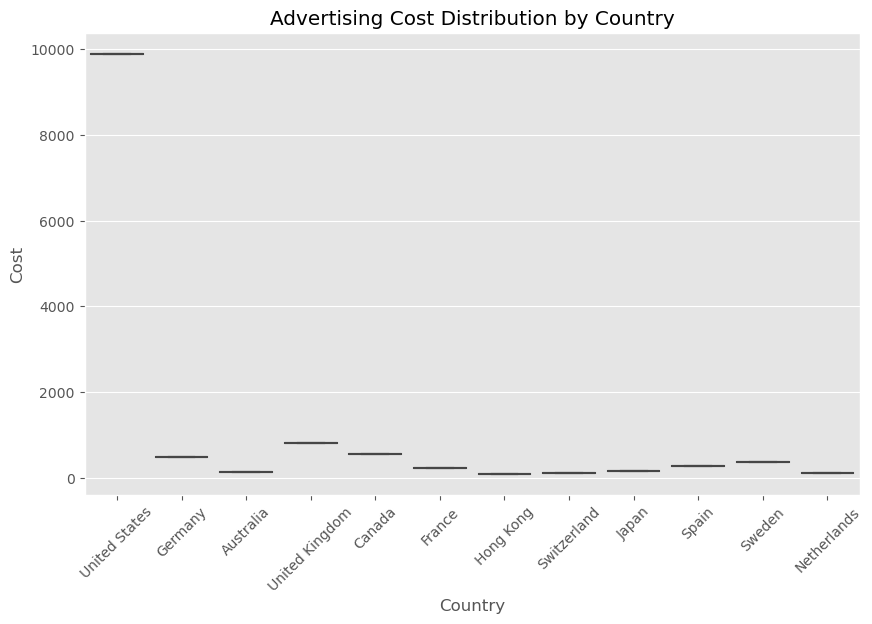

In [97]:
#In the analysis above it was clear that US market is an outlier in our data and will proceed to check how much of an outlier it is compared to the rest.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Cost', data=main_file)
plt.title('Advertising Cost Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [103]:
# Will remove the outlier country (US) and proceed to do the analysis without the outlier now
no_outlier_df = main_file[main_file['Country'] !='United States']


In [109]:
numeric_columns = main_file.select_dtypes(include=['number'])

In [111]:
# Calculate correlation matrices for numeric data
correlation_with_outlier = numeric_columns.corr(method='pearson')

# Assuming 'no_outlier_df' is your DataFrame without the outlier row
# Also select only numeric columns
numeric_no_outlier = no_outlier_df.select_dtypes(include=['number'])

correlation_without_outlier = numeric_no_outlier.corr(method='pearson')


In [113]:
# Print the correlation matrices
print("Correlation Matrix with Outlier:")
print(correlation_with_outlier)


Correlation Matrix with Outlier:
                         Ecommerce purchases  Purchase revenue  Checkouts  \
Ecommerce purchases                 1.000000          0.999943   0.998690   
Purchase revenue                    0.999943          1.000000   0.998538   
Checkouts                           0.998690          0.998538   1.000000   
Add to carts                        0.997616          0.997614   0.999007   
New users                           0.996876          0.996435   0.998747   
Total users                         0.996729          0.996261   0.998633   
Bounce rate                        -0.345783         -0.349538  -0.357678   
Sessions                            0.996555          0.996136   0.998585   
Views per user                     -0.310441         -0.307572  -0.314300   
Average engagement time            -0.172361         -0.169331  -0.173000   
Cost                                0.997320          0.997170   0.997471   
Conversions                         0.99837

In [115]:
print("\nCorrelation Matrix without Outlier:")
print(correlation_without_outlier)


Correlation Matrix without Outlier:
                         Ecommerce purchases  Purchase revenue  Checkouts  \
Ecommerce purchases                 1.000000          0.987042   0.779702   
Purchase revenue                    0.987042          1.000000   0.751457   
Checkouts                           0.779702          0.751457   1.000000   
Add to carts                        0.619330          0.618707   0.860868   
New users                           0.584808          0.515862   0.855617   
Total users                         0.587200          0.515923   0.851104   
Bounce rate                         0.164509          0.104048  -0.027738   
Sessions                            0.576392          0.513700   0.851524   
Views per user                     -0.305442         -0.260514  -0.301742   
Average engagement time            -0.243131         -0.197110  -0.207594   
Cost                                0.510543          0.481725   0.611780   
Conversions                         0.7

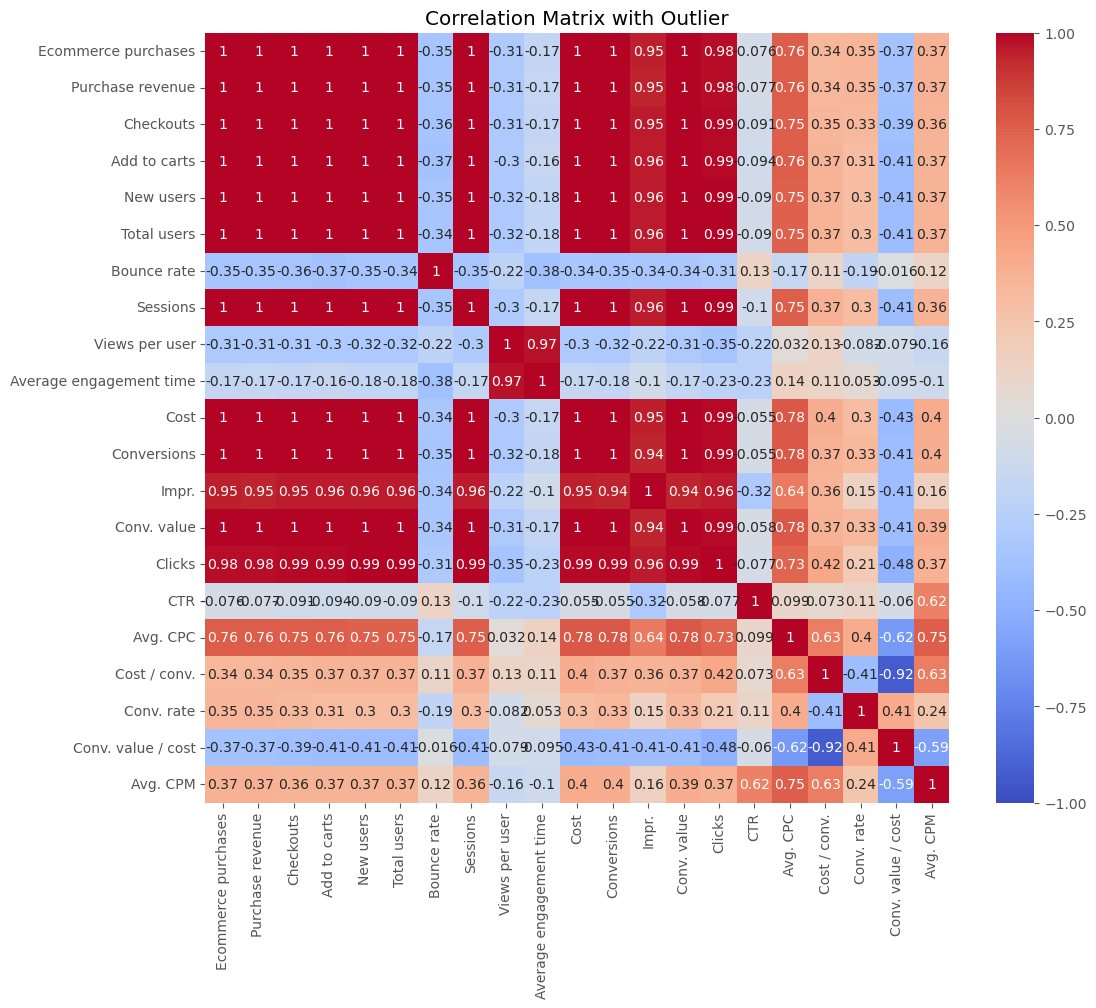

In [117]:
#In this heatmap we can see that the correlation of Ecommerce purchases to the ad cost is nearly 1 (0.99) which is a nearly perfect correlation.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_with_outlier, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Outlier')
plt.show()

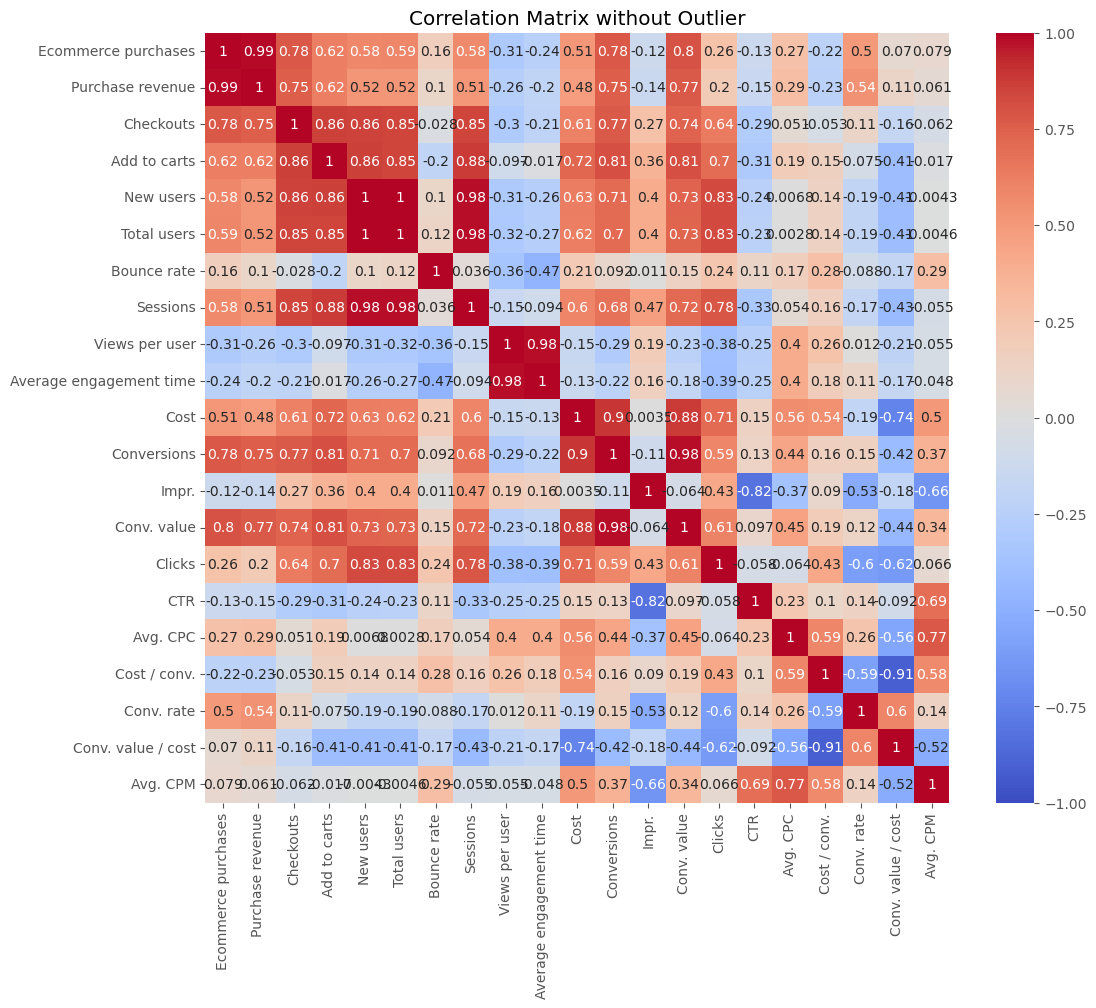

In [119]:
#our correlation drops to 0.51 with the outlier removal (ecommerce purhcases - cost) and 0.48 (revenue - cost). While it is stille a positive correlation its moderate compared to the nearly perfect correlation where outliers are included.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_without_outlier, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix without Outlier')
plt.show()

In [ ]:
#Even though the US is an outlier with significantly higher advertising costs and revenues compared to other countries, it should be included in the analysis because it represents a major portion of both advertising spend and sales. 
#However, it’s important to note that when the US is excluded from the analysis, the correlation between advertising cost and purchase revenue drops substantially. This indicates that for the rest of the dataset, there is not as strong a relationship between advertising spend and revenue, suggesting that the high correlation observed is largely driven by the US market.